# MIE1624 - Group 10: Extracting and exploring Twitter data

### Developed by:
Santiago Zuluaga, Bradley Kloostra, Yair Levin, Khashayar Ebrahimi & Takuya Harada

## Part I: Package loading and environment preparation

In [1]:
#import package to use Twitter API
try:
    import tweepy #If tweepy is already installed on the system
except:
    !pip install tweepy

#import OS package to interact with file paths/OS commands
import os
#import pandas dataframe package
import pandas as pd
#import re package for the use of regular expressions
import re
#import package for string handling
import string
try:
    import emoji #If tweepy is already installed on the system
except:
    !pip install emoji

#import nltk package for text processing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BKloostra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BKloostra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BKloostra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The first step to access publicly available Twitter data is to create a developer account (visit https://developer.twitter.com/ to get started). After creating a developer account, we must create an 'app'; this will give us developer Twitter credentials that will then be used to access the Twitter API:

In [2]:
#Twitter credentials for the app (Twitter account created for this assignment)
consumer_key = #Insert api credentials here
consumer_secret = #Insert api credentials here
access_token = #Insert api credentials here
access_token_secret = #Insert api credentials here

Using the _tweepy_ package (https://www.tweepy.org/), one of the many open access Python libraries, we will setup the connection between the Twitter API and our notebook:

In [3]:
#Passing Twitter credentials to Tweepy. This creates a connection between the Twitter API and our IPython Notebook
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## Part II: Set up and showcase of text pre-processing

In this part of the notebook, we will create some appropriate functions to pre-process and clear text data acquired from the Twitter API. First, we will define a set of emoticons and emojis&mdash;very common in tweets&mdash;in order to be able to remove them from our tweets' body. This will help reduce the amount of text information that is not useful as a feature.

Solution to remove emoji patterns based on the question presented in: https://stackoverflow.com/questions/26568722/remove-unicode-emoji-using-re-in-python

Solution to remove happy and sad emoticons based on: https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf

In [4]:
# Define set of happy emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
#Function to remove emojis
def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)
 
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

Now, we will perform basic pre-processing on a sample tweet. Then, we will define a function called _tweet_nlp_ to perform these actions automatically on a text tweet.

In [5]:
sample_tweet = 'Commuter CHAOS on the #TTC 🚌 ... #embarrassing compared to other cities :('
print(sample_tweet)

Commuter CHAOS on the #TTC 🚌 ... #embarrassing compared to other cities :(


In [6]:
#before tokenizing, remove common content in tweets such as the RT sign, and links for retweets using regular expressions:
sample_tweet = re.sub(r'https?://\S+', '', sample_tweet)
sample_tweet = re.compile('RT @').sub('@', sample_tweet, count=1)
print(sample_tweet)

Commuter CHAOS on the #TTC 🚌 ... #embarrassing compared to other cities :(


In [7]:
#start by tokenize the tweet (separate it the text into words, or n-grams) with nltk
word_tokens = word_tokenize(sample_tweet) 
print(word_tokens)

['Commuter', 'CHAOS', 'on', 'the', '#', 'TTC', '🚌', '...', '#', 'embarrassing', 'compared', 'to', 'other', 'cities', ':', '(']


In [8]:
#convert text into lowercase
word_tokens = [word.lower() for word in word_tokens]
print(word_tokens)

['commuter', 'chaos', 'on', 'the', '#', 'ttc', '🚌', '...', '#', 'embarrassing', 'compared', 'to', 'other', 'cities', ':', '(']


In [9]:
#remove emoticons and emojis
word_tokens = [word for word in word_tokens if not word in emoticons]
word_tokens = [remove_emoji(word) for word in word_tokens]
print(word_tokens)

['commuter', 'chaos', 'on', 'the', '#', 'ttc', '', '...', '#', 'embarrassing', 'compared', 'to', 'other', 'cities', ':', '(']


In [10]:
#remove punctuation signs from tokens
table = str.maketrans('', '', string.punctuation)
word_tokens = [word.translate(table) for word in word_tokens]
print(word_tokens)

['commuter', 'chaos', 'on', 'the', '', 'ttc', '', '', '', 'embarrassing', 'compared', 'to', 'other', 'cities', '', '']


In [11]:
#remove non-alphabetic characters
word_tokens = [word for word in word_tokens if word.isalpha()]
print(word_tokens)

['commuter', 'chaos', 'on', 'the', 'ttc', 'embarrassing', 'compared', 'to', 'other', 'cities']


In [12]:
#remove stopwords
stop_words = set(stopwords.words('english')) #import a predefined set of stopwords from the nltk package
word_tokens = [word for word in word_tokens if not word in stop_words]
print(word_tokens)

['commuter', 'chaos', 'ttc', 'embarrassing', 'compared', 'cities']


In [13]:
# stemming of words (remove stems)
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
word_tokens = [stemmer.stem(word) for word in word_tokens]
print(word_tokens)

['commut', 'chao', 'ttc', 'embarrass', 'compar', 'citi']


In [14]:
#lemmatization of words (express in base form)
lemmatizer = nltk.WordNetLemmatizer()
word_tokens = [lemmatizer.lemmatize(word) for word in word_tokens]
print(word_tokens)

['commut', 'chao', 'ttc', 'embarrass', 'compar', 'citi']


In [15]:
#join the tokens of the clean tweet back into a string with spaces in between
clean_tweet_str = ' '.join(word_tokens)
print(clean_tweet_str)

commut chao ttc embarrass compar citi


Now, we integrate all of these functionalities into a function:

In [16]:
def tweet_nlp(tweet):
    #before tokenizing, remove common content in tweets such as the RT sign, and links for retweets using regular expressions:
    tweet = re.sub(r'https?://\S+', '', tweet)
    tweet = re.compile('RT @').sub('@', tweet, count=1)
    
    #start by tokenize the tweet (separate it the text into words, or n-grams) with nltk
    word_tokens = word_tokenize(tweet) 
 
    #convert text into lowercase
    word_tokens = [word.lower() for word in word_tokens]
 
    #remove emoticons and emojis
    word_tokens = [word for word in word_tokens if not word in emoticons]
    word_tokens = [remove_emoji(word) for word in word_tokens]
    
    #remove punctuation signs from tokens
    table = str.maketrans('', '', string.punctuation)
    word_tokens = [word.translate(table) for word in word_tokens]
    
    #remove non-alphabetic characters
    word_tokens = [word for word in word_tokens if word.isalpha()]
    
    #remove stopwords
    stop_words = set(stopwords.words('english')) #import a predefined set of stopwords from the nltk package
    word_tokens = [word for word in word_tokens if not word in stop_words]
    
    # stemming of words (remove stems)
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    word_tokens = [stemmer.stem(word) for word in word_tokens]
    
    #lemmatization of words (express in base form)
    lemmatizer = nltk.WordNetLemmatizer()
    word_tokens = [lemmatizer.lemmatize(word) for word in word_tokens]
    
    clean_tweet = [] #create empty list to store the final tokens after text processing
    for w in word_tokens:
        clean_tweet.append(w)

    #join the tokens of the clean tweet back into a string with spaces in between
    clean_tweet_str = ' '.join(clean_tweet)
    
    #return the clean tweet string
    return clean_tweet_str

## Part III: Acquiring Twitter data from the Twitter API

Now, we will start the process of acquiring Twitter data. First, we need to create a file that will store our processed tweet data&mdash;in this case, we will use comma-separated values (CSV) as a filetype. Further, we need to define the fields that will be stored in this text file:

In [17]:
#Create paths to csv file in which the tweet data will be stored
tweet_datafile = "tweet_data.csv"

In [18]:
#Define column names of the csv file
info_columns = ['id', 'created_at', 'source', 'original_text','clean_text', 'lang',
        'like_count', 'retweet_count', 'original_author', 'hashtags',
        'user_mentions', 'original_num_words', 'clean_num_words',
        'original_num_chars', 'clean_num_chars',
        'original_avg_word_length', 'clean_avg_word_length', 'num_stopwords']

Finally, we will specify the date range used for our Twitter data scraping. This will set the temporal boundaries of our search:

In [19]:
#Set a date range using the start_date and the end_date variables
start_date = '2019-12-01'
end_date = '2020-01-31'

Now, we will write a function (this gives us flexibility in the application of different queries and needs) that goes into the Twitter API using _tweepy_ and stores the relevant results from a keyword-based search into our csv file. As will be shown in the code, the _tweepy_ Cursor tool allows to extract metadata from the tweets, such as number of retweets and likes, as well as basic features such as number of words, length of words, etc.

Code for this function is partially based on the following example: https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf

In [29]:
def tweet_saver(keyword, file, npages = 20, resperpage = 50):
    #The arguments are: keyword (query), file (filename), and number of result pages to search within the Twitter API
    
    # first, we create an empty pandas dataframe (df) based on the columns defined previously.
    # each row of the dataframe will be a retrieved tweet.
    df = pd.DataFrame(columns=info_columns)
    
    # looping over results pages according to the tweepy documentation
    for page in tweepy.Cursor(api.search, q=keyword, since=start_date, count = resperpage, tweet_mode="extended").pages(npages):
        for status in page: 
            status = status._json #the status variable represents each tweet retrieved from the search.
                                  #tweepy returns a JSON type variable, which we are converting to python list
             
            ## Basic feature extraction and data processing
            
            #get tweet text
            try:
                original_text = status['retweeted_status']['full_text']
            except:
                original_text = status['full_text']
                
            # call our previously defined function to clean the tweet text, status['text']:
            filtered_tweet=tweet_nlp(original_text)

            # create a list that contains all the information we need for the tweet row
            new_row = [status['id'], status['created_at'],
                          status['source'], original_text,filtered_tweet, status['lang'],
                          status['favorite_count'], status['retweet_count']]
 
            # append original author of the tweet to the row entry
            new_row.append(status['user']['screen_name'])

            # tweepy allows us to save different entities from a tweet such as hashtags and mentions
            # here, we use a list comprehension to loop over the hastag and user mention entities and save them
            hashtags = ", ".join([hashtag_item['text'] for hashtag_item in status['entities']['hashtags']])
            new_row.append(hashtags)
            
            mentions = ", ".join([mention['screen_name'] for mention in status['entities']['user_mentions']])
            new_row.append(mentions)
            
            #Now, we perform basic feature extraction for the tweet
            
            original_words = original_text.split()
            clean_words = filtered_tweet.split()
            
            #number of words
            original_num_words = len(original_words)
            new_row.append(original_num_words)
            clean_num_words = len(clean_words)
            new_row.append(clean_num_words)
            
            #number of characters
            original_num_chars = len(original_text)
            new_row.append(original_num_chars)
            clean_num_chars = len(filtered_tweet)
            new_row.append(clean_num_chars)
            
            #Average word length
            if len(original_words) > 0 and len(clean_words) > 0:
                original_avg_word_length = sum(map(len, original_words))/float(len(original_words))
                new_row.append(original_avg_word_length)
                clean_avg_word_length = sum(map(len, clean_words))/float(len(clean_words))
                new_row.append(clean_avg_word_length)
            elif len(original_words) > 0 and len(clean_words) == 0:
                original_avg_word_length = sum(map(len, original_words))/float(len(original_words))
                new_row.append(original_avg_word_length)
                clean_avg_word_length = 0
                new_row.append(clean_avg_word_length)
            else:
                original_avg_word_length = 0
                new_row.append(original_avg_word_length)
                clean_avg_word_length = 0
                new_row.append(clean_avg_word_length)
            
            #number of stopwords
            stop_words = set(stopwords.words('english')) #import a predefined set of stopwords from the nltk package
            tweet_stop_words = [word.lower() for word in original_words if word.lower() in stop_words]
            new_row.append(len(tweet_stop_words))
            
            ## Optional data - not included in this example
            
            # You can only keep tweets that are in English. This line may be modified or removed accordingly.
            if status['lang'] != 'en':
                continue
            
            # tweepy provides a classification for tweets with possibly sensitive content. 
            # uncomment this try-except block if interested in obtaining the sensitive content classification.
        
            #try:
            #    is_sensitive = status['possibly_sensitive']
            #except KeyError:
            #    is_sensitive = None
            #new_row.append(is_sensitive)
 
            # tweepy allows to get location of the tweet if possible. uncomment if needed.
            # The following block appends the following: location name, and coordinates (if found)
            #try:
            #    location = status['user']['location']
            #except TypeError:
            #    location = ''
            #new_row.append(location)
 
            #try:
            #    coordinates = [coord for loc in status['place']['bounding_box']['coordinates'] for coord in loc]
            #except TypeError:
            #    coordinates = None
            #new_row.append(coordinates)
            
            
            ## Data storing into dataframe and csv file
            
            #store the row as a single-row dataframe
            single_tweet_df = pd.DataFrame([new_row], columns=info_columns)
            
            #append the single row dataframe into the main dataframe
            df = df.append(single_tweet_df, ignore_index=True)
            
            #open the csv file with filename given as parameter and store the dataframe in the file
            csv_file = open(file, 'a' ,encoding='utf-8')
    
    #save the final dataframe into the csv file
    df.to_csv(csv_file, mode='a', columns=info_columns, index=False, encoding="utf-8")
    
    #return the dataframe as function output
    return df

In [30]:
#declare keywords as a query for three categories
query = 'brexit'

In [38]:
#call tweet_saver function to search and download data into a file
tweet_df = tweet_saver(query, tweet_datafile,npages = 100, resperpage= 50)

## Part IV: Extraction of basic features from the acquired data

Now, we will take the dataframe of downloaded and pre-processed tweets to extract basic features such as number of words, number of characters, etc.

In [39]:
tweet_df.head()

,id,created_at,source,original_text,clean_text,lang,like_count,retweet_count,original_author,hashtags,user_mentions,original_num_words,clean_num_words,original_num_chars,clean_num_chars,original_avg_word_length,clean_avg_word_length,num_stopwords
0,1229845758033133571,Tue Feb 18 19:10:52 +0000 2020,"<a href=""http://twitter.com/download/android"" ...",“The main problem with the BBC is that it no l...,main problem bbc longer speak nation speak wok...,en,0,610,jameson_daniels,,spikedonline,49,25,297,152,5.061224,5.120000,21
1,1229845755957055488,Tue Feb 18 19:10:52 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",There are many standout points in @DavidGHFros...,mani standout point davidghfrost brexit speech...,en,0,15,fiegehen,,"BobbyMcDonagh1, DavidGHFrost",42,27,278,184,5.642857,5.851852,15
2,1229845753234894848,Tue Feb 18 19:10:51 +0000 2020,"<a href=""https://about.twitter.com/products/tw...",#Brexit means UK must leave European Space Age...,brexit mean uk must leav european space agenc ...,en,0,8,YorkshireTaff,Brexit,"uk_rants, BBCr4today",45,28,274,158,5.111111,4.678571,14
3,1229845751410413572,Tue Feb 18 19:10:51 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",#Brexit means UK must leave European Space Age...,brexit mean uk must leav european space agenc ...,en,0,8,AnnetteVitelli3,Brexit,"uk_rants, BBCr4today",45,28,274,158,5.111111,4.678571,14
4,1229845731776892928,Tue Feb 18 19:10:46 +0000 2020,"<a href=""http://twitter.com/#!/download/ipad"" ...",@Andrew_Adonis Destroying Corbynism was key to...,andrewadoni destroy corbyn key deliv torus bre...,en,0,1,yagbebi,,"MaryKapadia, Andrew_Adonis",47,34,277,195,4.914894,4.764706,13


In [41]:
tweet_df.describe()

,original_avg_word_length,clean_avg_word_length
count,4621.000000,4621.000000
mean,5.625065,5.369825
std,1.115227,0.713670
min,3.568182,3.000000
25%,5.000000,4.875000
50%,5.428571,5.291667
75%,6.000000,5.700000
max,15.666667,10.500000


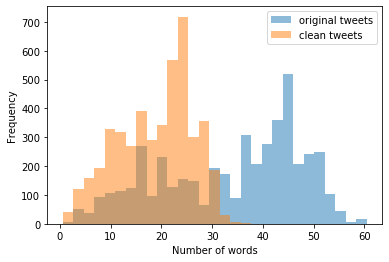

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bins = np.linspace(0.5, 60.5, 30)
plt.hist(tweet_df.original_num_words, bins=bins, alpha=0.5, label='original tweets')
plt.hist(tweet_df.clean_num_words, bins=bins, alpha=0.5, label='clean tweets')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('words.png', dpi=300, format='png')

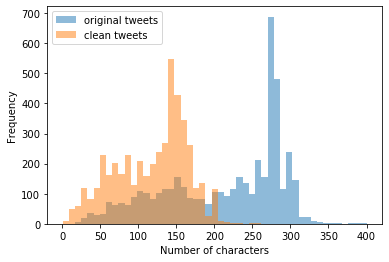

In [45]:
bins = np.linspace(0.5, 400.5, 50)
plt.hist(tweet_df.original_num_chars, bins=bins, alpha=0.5, label='original tweets')
plt.hist(tweet_df.clean_num_chars, bins=bins, alpha=0.5, label='clean tweets')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('chars.png', dpi=300, format='png')